<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
    <font color='green'> <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>

Павел, доброго дня! рад приветствовать тебя) <br />
<br />    

<br />
Меня зовут Николай Шавлюго. <br />И на этом этапе твоего движения к новой профессии от меня будут комментарии по написанному коду. <br />Чтобы меньше "мусорить эфир" и чтобы максимально наглядно отделяться от основного кода, есть предложение условиться в некоторых обозначениях:<br /> <br />
<u><b>ТАКОЙ ШРИФТ</b></u> - всегда начало комментария <br />
<font color='green'>такой шрифт</font> - комментарии о том, что всё ОК <br/>
<font color='orange'>такой шрифт</font> - комментарии о том, что всё ОК по результату,<br> однако есть на что обратить внимание в плане применения техник, или есть способы сделать более короткий или быстрый код <br/>
<font color='red'>такой шрифт</font> - комментарии о том, что есть критичный момент, влияющий на бизнес-результат проекта.<br/>
</font><br /><br />
<font color='green'>Моей целью является не "уличить" в не знании, а просто высказать сверху твоих знаний - свой опыт, что бы ты мог использовать его для своего дальнейшего успеха) И очень здорово будет, если тебе удастся задавать вопросы, да и вообще - всячески доставать меня, если я по каким-то причинам не приму проект:) При этом, из своего опыта скажу, хорошо и важно, когда переписка ревьюера и студента - сохраняется на следующие проекты и даже на будущую практическую деятельность.<br>
<br> Я сразу же начал общаться на ты:) но если это не очень удобно, то дай знать)) <BR> В ПУТЬ!<br>

# Описание проекта

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. В вашем распоряжении данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

______

###### Данное исследование разделено на несколько частей.

* [1. Подготовка данных.](#section1)
* [2. Исследовательский анализ.](#section2)
* [3. Построение модели.](#section3)
* [4. Выводы.](#section4)

______

<a id='section1'> </a>

# 1. Подготовка данных

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, make_scorer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, VotingRegressor
from sklearn.dummy import DummyRegressor
from tqdm.notebook import tqdm
from catboost import Pool, cv, CatBoostRegressor
np.set_printoptions(precision=4)

In [2]:
train = pd.read_csv('/datasets/gold_recovery_train.csv')
train_init_len = len(train)

In [3]:
train.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
date                                                  16860 non-null object
final.output.concentrate_ag                           16788 non-null float64
final.output.concentrate_pb                           16788 non-null float64
final.output.concentrate_sol                          16490 non-null float64
final.output.concentrate_au                           16789 non-null float64
final.output.recovery                                 15339 non-null float64
final.output.tail_ag                                  16794 non-null float64
final.output.tail_pb                                  16677 non-null float64
final.output.tail_sol                                 16715 non-null float64
final.output.tail_au                                  16794 non-null float64
primary_cleaner.input.sulfate                         15553 non-null float64
primary_cleaner.input.depressant             

Практически все колонки в данных - числовые. Единственным исключением является колонка date которую далее необходимо преобразовать к типу datetime. Так же в данных имеются пропуски их необходимо заполнить до создания моделей. Прочитаем остальные таблицы.

In [5]:
test = pd.read_csv('/datasets/gold_recovery_test.csv')
test.head()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
date                                          5856 non-null object
primary_cleaner.input.sulfate                 5554 non-null float64
primary_cleaner.input.depressant              5572 non-null float64
primary_cleaner.input.feed_size               5856 non-null float64
primary_cleaner.input.xanthate                5690 non-null float64
primary_cleaner.state.floatbank8_a_air        5840 non-null float64
primary_cleaner.state.floatbank8_a_level      5840 non-null float64
primary_cleaner.state.floatbank8_b_air        5840 non-null float64
primary_cleaner.state.floatbank8_b_level      5840 non-null float64
primary_cleaner.state.floatbank8_c_air        5840 non-null float64
primary_cleaner.state.floatbank8_c_level      5840 non-null float64
primary_cleaner.state.floatbank8_d_air        5840 non-null float64
primary_cleaner.state.floatbank8_d_level      5840 non-null float64
rougher.in

In [7]:
full = pd.read_csv('/datasets/gold_recovery_full.csv')

In [8]:
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
date                                                  22716 non-null object
final.output.concentrate_ag                           22627 non-null float64
final.output.concentrate_pb                           22629 non-null float64
final.output.concentrate_sol                          22331 non-null float64
final.output.concentrate_au                           22630 non-null float64
final.output.recovery                                 20753 non-null float64
final.output.tail_ag                                  22633 non-null float64
final.output.tail_pb                                  22516 non-null float64
final.output.tail_sol                                 22445 non-null float64
final.output.tail_au                                  22635 non-null float64
primary_cleaner.input.sulfate                         21107 non-null float64
primary_cleaner.input.depressant             

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> 
<u>КОММЕНТАРИЙ РЕВЬЮЕРА</u>
<font color='green'><br>
данные на базе! ОК)

Проверим что сумма длин тестовой и обучающей выборки равна длине полной выборки 

In [9]:
len(test) + len(train) == len(full)

True

Преобразуем столбец date во всех датафреймах к типу datetime

In [10]:
train['date']

0        2016-01-15 00:00:00
1        2016-01-15 01:00:00
2        2016-01-15 02:00:00
3        2016-01-15 03:00:00
4        2016-01-15 04:00:00
                ...         
16855    2018-08-18 06:59:59
16856    2018-08-18 07:59:59
16857    2018-08-18 08:59:59
16858    2018-08-18 09:59:59
16859    2018-08-18 10:59:59
Name: date, Length: 16860, dtype: object

In [11]:
train['date'] = pd.to_datetime(train['date'], format='%Y-%m-%d %H:%M:%S')
train['date']

0       2016-01-15 00:00:00
1       2016-01-15 01:00:00
2       2016-01-15 02:00:00
3       2016-01-15 03:00:00
4       2016-01-15 04:00:00
                ...        
16855   2018-08-18 06:59:59
16856   2018-08-18 07:59:59
16857   2018-08-18 08:59:59
16858   2018-08-18 09:59:59
16859   2018-08-18 10:59:59
Name: date, Length: 16860, dtype: datetime64[ns]

In [12]:
test['date'] = pd.to_datetime(test['date'], format='%Y-%m-%d %H:%M:%S')
full['date'] = pd.to_datetime(full['date'], format='%Y-%m-%d %H:%M:%S')

Заполним пропуски в данных. Для начала оценим какая доля данных пропущена в столбце rougher.output.concentrate_au

In [13]:
train['rougher.output.concentrate_au'].isna().mean()

0.004863582443653618

Так как доля данных строк заниемает менее 0,5% данные строки можно удалить из датасетов 

In [14]:
train = train.drop(train.index[train['rougher.output.concentrate_au'].isna()])
full = full.drop(full.index[full['rougher.output.concentrate_au'].isna()])

In [15]:
# проверим что функция сработала так как задуманно
train['rougher.output.concentrate_au'].isna().mean()

0.0

Аналогично оценим долю пропущеных данных в столбце rougher.input.feed_au. Так как нас интересуют предсказания доли золота по окончанию техпроцесса, то строки для которых доля золота в исходном сырье равна нулю так же из датасетов исключим

In [16]:
train['rougher.input.feed_au'].isna().mean()

5.960185957801883e-05

In [17]:
(train['rougher.input.feed_au'] == 0).mean()

0.06907855525092382

In [18]:
# удалим из обучающего датасета строки в которых данные о содержании золота в исходном сырье незаполнены
# или содержание золота равно нулю
train = train.drop(train.index[train['rougher.input.feed_au'].isna()])
train = train.drop(train.index[train['rougher.input.feed_au'] == 0])
test = test.drop(test.index[test['rougher.input.feed_au'].isna()])
test = test.drop(test.index[test['rougher.input.feed_au'] == 0])
full = full.drop(full.index[full['rougher.input.feed_au'].isna()])
full = full.drop(full.index[full['rougher.input.feed_au'] == 0])

In [19]:
# проверим что функция сработала так как задуманно
full['rougher.input.feed_au'].isna().mean()

0.0

Оценим долю незаполненных строк в столбце rougher.output.tail_au

In [20]:
full['rougher.output.tail_au'].isna().mean()

0.0567594480534876

Доля незаполненных строк в данном столбце приближается к 6% и удалять их не желательно. Оценим распределение по данному параметру

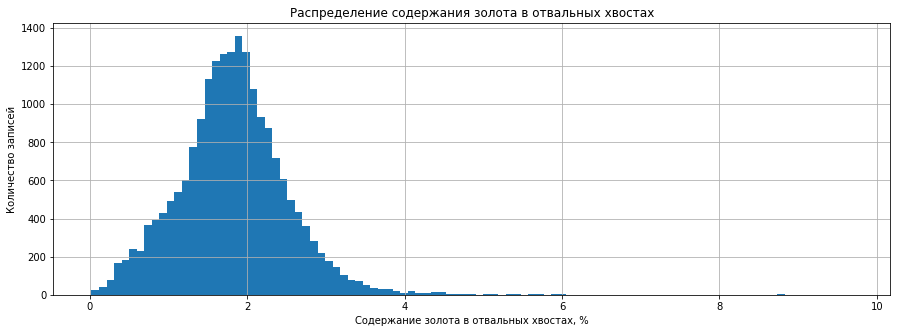

In [21]:
(full['rougher.output.tail_au'].hist(bins=101, figsize=(15,5))
 .set(xlabel='Содержание золота в отвальных хвостах, %', 
      ylabel='Количество записей',  
      title='Распределение содержания золота в отвальных хвостах'));

In [22]:
train['rougher.output.tail_au'].describe()

count    14547.000000
mean         1.761855
std          0.730830
min          0.020676
25%          1.310091
50%          1.744990
75%          2.188485
max          9.688980
Name: rougher.output.tail_au, dtype: float64

Распределение близко к нормальному. Медиана не сильно отличается от среднего значения, а значит в распределении не существенных выбросов. Заполним пропуски средними значениями расчитанными по тестовой выборке

In [23]:
train['rougher.output.tail_au'] = train['rougher.output.tail_au'].fillna(train['rougher.output.tail_au'].mean())
full['rougher.output.tail_au'] = full['rougher.output.tail_au'].fillna(train['rougher.output.tail_au'].mean())

In [24]:
# проверим что замена прошла так как задуманно
(full['rougher.output.tail_au']).isna().mean()

0.0

Так же исключим из данных случаи когда на стадии флотаци все выходное золото остается в "хвостах"

In [25]:
train = train.drop(train.index[train['rougher.output.concentrate_au'] == train['rougher.output.tail_au']])
full = full.drop(full.index[full['rougher.output.concentrate_au'] == full['rougher.output.tail_au']])

In [26]:
# проверка
(train['rougher.output.concentrate_au'] == train['rougher.output.tail_au']).mean()

0.0

Так же из данных необходимо исключить случаи когда содержание золота в "хвостах" больше чем содержание золота в исходном сырье

In [27]:
(train['rougher.input.feed_au'] < train['rougher.output.tail_au']).mean()

0.028364707388910233

In [28]:
train = train.drop(train.index[train['rougher.input.feed_au'] < train['rougher.output.tail_au']])
full = full.drop(full.index[full['rougher.input.feed_au'] < full['rougher.output.tail_au']])
# проверка
(train['rougher.input.feed_au'] < train['rougher.output.tail_au']).mean()

0.0

Оценим эффективность обогащения на стадии флотации на тестовой выборке по заданным формулам

In [29]:
c = train['rougher.output.concentrate_au']
f = train['rougher.input.feed_au']
t = train['rougher.output.tail_au']
train['rougher.output.recovery_manual_calc'] = (c * (f - t)) / (f * (c - t)) * 100

In [30]:
c = full['rougher.output.concentrate_au']
f = full['rougher.input.feed_au']
t = full['rougher.output.tail_au']
full['rougher.output.recovery_manual_calc'] = (c * (f - t)) / (f * (c - t)) * 100

Оценим на сколько близка оценка обогащения полученная по формуле к оценке приведенной в датасете (для заполненных строк)

In [31]:
full_rougher_notna_index = full.index[full['rougher.output.recovery'].notna()]
mean_absolute_error(full.loc[full_rougher_notna_index, 'rougher.output.recovery'], 
                    full.loc[full_rougher_notna_index, 'rougher.output.recovery_manual_calc'])

9.823469458453012e-15

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> 
<u>КОММЕНТАРИЙ РЕВЬЮЕРА</u>
<font color='green'><br>
ДА, верно,)

Оценки практически идентичны. 

Аналогично подготовим исходные данные и оценим по формуле эффективность обогащения по итогам всего техпроцесса

In [32]:
# доля строк для которых финальная концентрация золота равна нулю
train['final.output.concentrate_au'].isna().mean()

0.00032948929159802305

In [33]:
train = train.drop(train.index[train['final.output.concentrate_au'].isna()])
full = full.drop(full.index[full['final.output.concentrate_au'].isna()])
train['final.output.concentrate_au'].isna().mean()

0.0

In [34]:
#доля строк для которых концентрация золота по выходу первичной очистки равна нулю
(train['primary_cleaner.output.concentrate_au'] == 0).mean()

0.00988793671720501

In [35]:
train = train.drop(train.index[train['primary_cleaner.output.concentrate_au'] == 0])
full = full.drop(full.index[full['primary_cleaner.output.concentrate_au'] == 0])
(train['primary_cleaner.output.concentrate_au'] == 0).mean()

0.0

In [36]:
# так же удалим строки для которых итоговая концентрация равна концентрации в хвостах
train = train.drop(train.index[train['final.output.concentrate_au'] == train['final.output.tail_au']])
full = full.drop(full.index[full['final.output.concentrate_au'] == full['final.output.tail_au']])

In [37]:
# строки в которых содержание золота в исходном сырье меньше чем содержание золота в хвостах
(train['primary_cleaner.output.concentrate_au'] < train['final.output.tail_au']).mean()

0.011412934659280519

In [38]:
train = train.drop(train.index[train['primary_cleaner.output.concentrate_au'] < train['final.output.tail_au']])
full = full.drop(full.index[full['primary_cleaner.output.concentrate_au'] < full['final.output.tail_au']])
# проверка
(train['primary_cleaner.output.concentrate_au'] < train['final.output.tail_au']).mean()

0.0

In [39]:
c = train['final.output.concentrate_au']
f = train['primary_cleaner.output.concentrate_au']
t = train['final.output.tail_au']
train['final.output.recovery_manual_calc'] = (c * (f - t)) / (f * (c - t)) * 100

In [40]:
c = full['final.output.concentrate_au']
f = full['primary_cleaner.output.concentrate_au']
t = full['final.output.tail_au']
full['final.output.recovery_manual_calc'] = (c * (f - t)) / (f * (c - t)) * 100

Оценим на сколько близка оценка обогащения полученная по формуле к оценке приведенной в датасете (для заполненных строк)

In [41]:
full_final_notna_index = full.index[(full['final.output.recovery'].notna()) & 
                                    (full['final.output.recovery_manual_calc'].notna())]
mean_absolute_error(full.loc[full_final_notna_index, 'final.output.recovery'], 
                    full.loc[full_final_notna_index, 'final.output.recovery_manual_calc'])

29.65250364043836

Точность оценки обогащения по результатам всех стадий технологического цикла (по формуле) ниже, чем точность отдельно для стадии флотации. Запролним пропущенные строки расчетными значениями.

In [42]:
train['rougher.output.recovery'] = train['rougher.output.recovery'].fillna(train['rougher.output.recovery_manual_calc'])
train['rougher.output.recovery'].isna().mean()

0.0

In [43]:
train['final.output.recovery'] = train['final.output.recovery'].fillna(train['final.output.recovery_manual_calc'])
train['final.output.recovery'].isna().mean()

0.0

In [44]:
full['rougher.output.recovery'] = full['rougher.output.recovery'].fillna(full['rougher.output.recovery_manual_calc'])
full['final.output.recovery'] = full['final.output.recovery'].fillna(full['final.output.recovery_manual_calc'])

Построим гистограмму распределения эффективности обогащения после стадии флотации и финальной стадии.

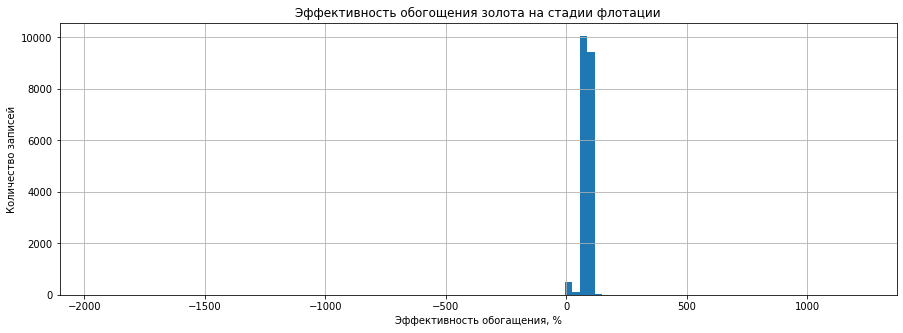

In [45]:
(full['rougher.output.recovery'].hist(bins=101, figsize=(15,5))
 .set(xlabel='Эффективность обогащения, %', 
      ylabel='Количество записей',  
      title='Эффективность обогощения золота на стадии флотации'));

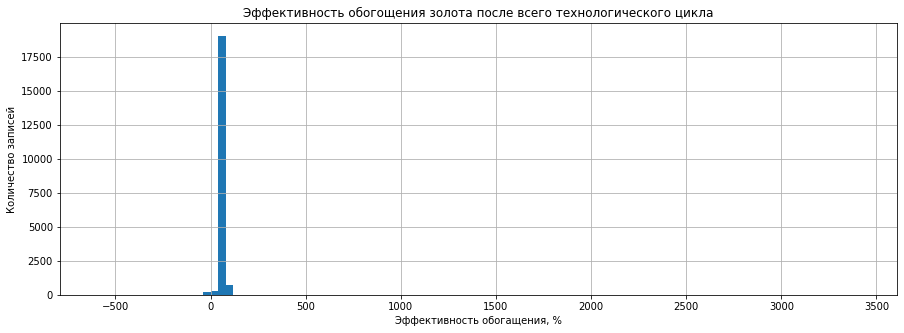

In [46]:
(full['final.output.recovery'].hist(bins=101, figsize=(15,5))
 .set(xlabel='Эффективность обогащения, %', 
      ylabel='Количество записей',  
      title='Эффективность обогощения золота после всего технологического цикла'));

Видно, что в распределениях встечаются аномалии. Удалим из датасетов все значения меньше либо равные нулю и более либо равные 100 %

In [47]:
((train['rougher.output.recovery'] <= 0) | (train['rougher.output.recovery'] >= 100)).mean()

0.03645692681609506

In [48]:
train = train.drop(train.index[(train['rougher.output.recovery'] <= 0) | (train['rougher.output.recovery'] >= 100)])
train = train.drop(train.index[(train['final.output.recovery'] <= 0) | (train['final.output.recovery'] >= 100)])
full = full.drop(full.index[(full['rougher.output.recovery'] <= 0) | (full['rougher.output.recovery'] >= 100)])
full = full.drop(full.index[(full['final.output.recovery'] <= 0) | (full['final.output.recovery'] >= 100)])

Еще раз посмотрим на гистограммы после удаления аномалий

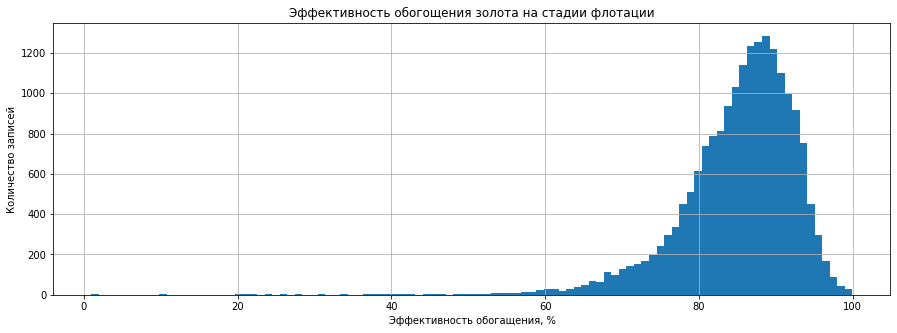

In [49]:
(full['rougher.output.recovery'].hist(bins=101, figsize=(15,5))
 .set(xlabel='Эффективность обогащения, %', 
      ylabel='Количество записей',  
      title='Эффективность обогощения золота на стадии флотации'));

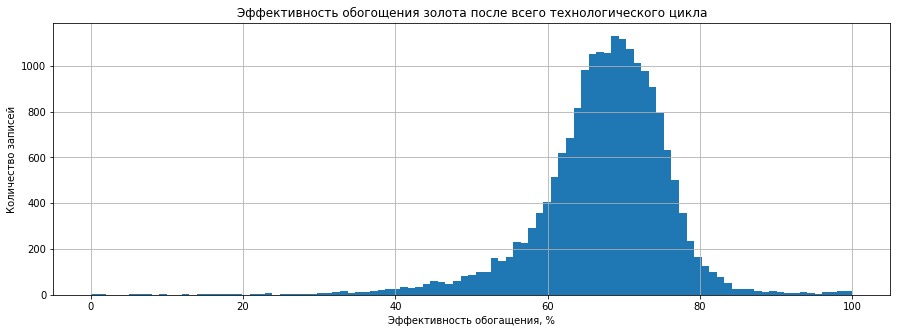

In [50]:
(full['final.output.recovery'].hist(bins=101, figsize=(15,5))
 .set(xlabel='Эффективность обогащения, %', 
      ylabel='Количество записей',  
      title='Эффективность обогощения золота после всего технологического цикла'));

Добавим в тестовую выборку столбцы rougher.output.recovery и final.output.recovery по соответствующим датам

In [51]:
test = test.merge(full.loc[:,['date','rougher.output.recovery', 'final.output.recovery']], on='date', how='left')

Строки в которых целевые признаки заменить не удалось удалим

In [52]:
test = test.drop(test.index[test['final.output.recovery'].isna()])
test['final.output.recovery'].isna().sum()

0

In [53]:
test = test.drop(test.index[test['rougher.output.recovery'].isna()])
test['rougher.output.recovery'].isna().sum()

0

Поскольку данные упорядочены по дате, а по условиям задачи соседние по времени параметры похожи, то остальные проруски в данных заполним ближайшими значениямиями. Заполнять будем только те столбцы которые имеются в тестовой выборке (в тестовой выборке нет признаков final.* и * .calculation.* )

In [54]:
train[test.columns] = train[test.columns].fillna(method='ffill')
test = test.fillna(method='ffill')

Проверим что в датасетах больше нет пропусков

In [55]:
train[test.columns].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14063 entries, 0 to 16859
Data columns (total 55 columns):
date                                          14063 non-null datetime64[ns]
primary_cleaner.input.sulfate                 14063 non-null float64
primary_cleaner.input.depressant              14063 non-null float64
primary_cleaner.input.feed_size               14063 non-null float64
primary_cleaner.input.xanthate                14063 non-null float64
primary_cleaner.state.floatbank8_a_air        14063 non-null float64
primary_cleaner.state.floatbank8_a_level      14063 non-null float64
primary_cleaner.state.floatbank8_b_air        14063 non-null float64
primary_cleaner.state.floatbank8_b_level      14063 non-null float64
primary_cleaner.state.floatbank8_c_air        14063 non-null float64
primary_cleaner.state.floatbank8_c_level      14063 non-null float64
primary_cleaner.state.floatbank8_d_air        14063 non-null float64
primary_cleaner.state.floatbank8_d_level      14063 non-

In [56]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5171 entries, 0 to 5470
Data columns (total 55 columns):
date                                          5171 non-null datetime64[ns]
primary_cleaner.input.sulfate                 5171 non-null float64
primary_cleaner.input.depressant              5171 non-null float64
primary_cleaner.input.feed_size               5171 non-null float64
primary_cleaner.input.xanthate                5171 non-null float64
primary_cleaner.state.floatbank8_a_air        5171 non-null float64
primary_cleaner.state.floatbank8_a_level      5171 non-null float64
primary_cleaner.state.floatbank8_b_air        5171 non-null float64
primary_cleaner.state.floatbank8_b_level      5171 non-null float64
primary_cleaner.state.floatbank8_c_air        5171 non-null float64
primary_cleaner.state.floatbank8_c_level      5171 non-null float64
primary_cleaner.state.floatbank8_d_air        5171 non-null float64
primary_cleaner.state.floatbank8_d_level      5171 non-null float64
ro

В заключении данного раздела оценим суммарное количество строк в обучающей выборке, удаленных в процессе предобработки

In [57]:
print('Суммарное количество удаленных в процессе предобработки строк в обучающей выборке {:.1%}'.format(
                                                                                            1 - (len(train) / train_init_len)))

Суммарное количество удаленных в процессе предобработки строк в обучающей выборке 16.6%


<a id='section2'> </a>

# 2. Анализ данных

## 2.1 Оценка изменения концентрации металлов (Au, Ag, Pb) на различных этапах очистки

**Золото**

Оценим как меняется концентрация золота при переходе от одной стадии техпроцесса к другой. Построим на графике первые 10 реализаций процесса.

In [58]:
au = train[['rougher.input.feed_au', 'rougher.output.concentrate_au', 'primary_cleaner.output.concentrate_au',
            'final.output.concentrate_au']]

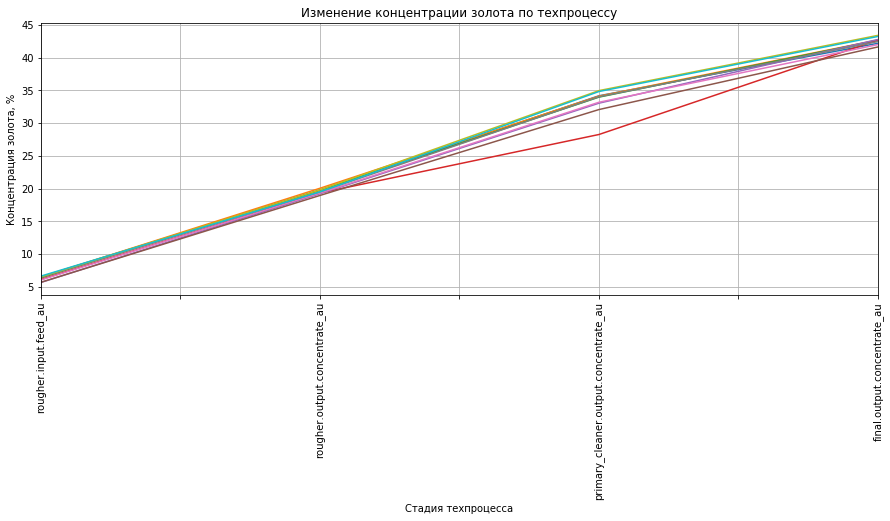

In [59]:
for i in range(0,10):
    (au.loc[i].plot(rot=90, grid=True, figsize=(15, 5)) 
     .set(xlabel='Стадия техпроцесса', 
      ylabel='Концентрация золота, %',  
      title='Изменение концентрации золота по техпроцессу'));

Видно что концентрация золота от стадии к стадии растет. Проведем аналогичное исследование для концентрации серебра

**Серебро**

In [60]:
ag = train[['rougher.input.feed_ag', 'rougher.output.concentrate_ag', 'primary_cleaner.output.concentrate_ag',
            'final.output.concentrate_ag']]

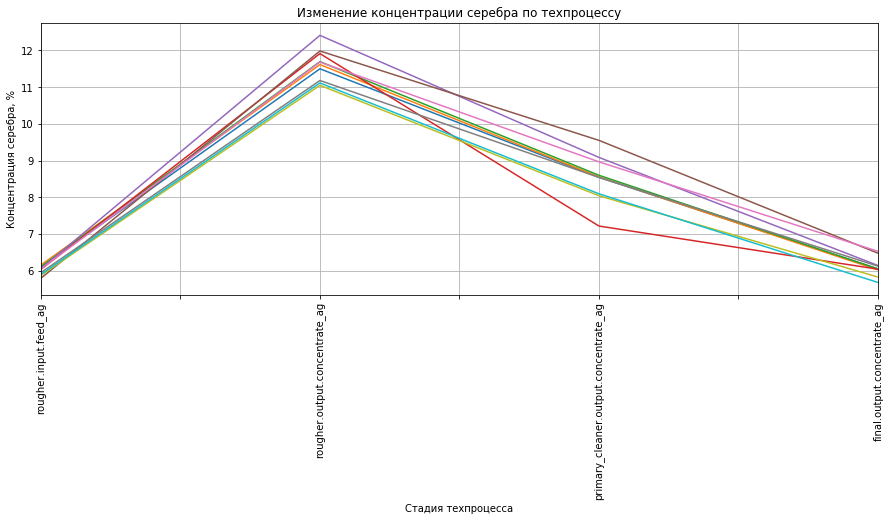

In [61]:
for i in range(0,10):
    (ag.loc[i].plot(rot=90, grid=True, figsize=(15, 5))
      .set(xlabel='Стадия техпроцесса', 
      ylabel='Концентрация серебра, %',  
      title='Изменение концентрации серебра по техпроцессу'));

Концентрация серебра растет на стадии флотации и затем уменшается на стадиях очистки

**Свинец**

In [62]:
pb = train[['rougher.input.feed_pb', 'rougher.output.concentrate_pb', 'primary_cleaner.output.concentrate_pb',
            'final.output.concentrate_ag']]

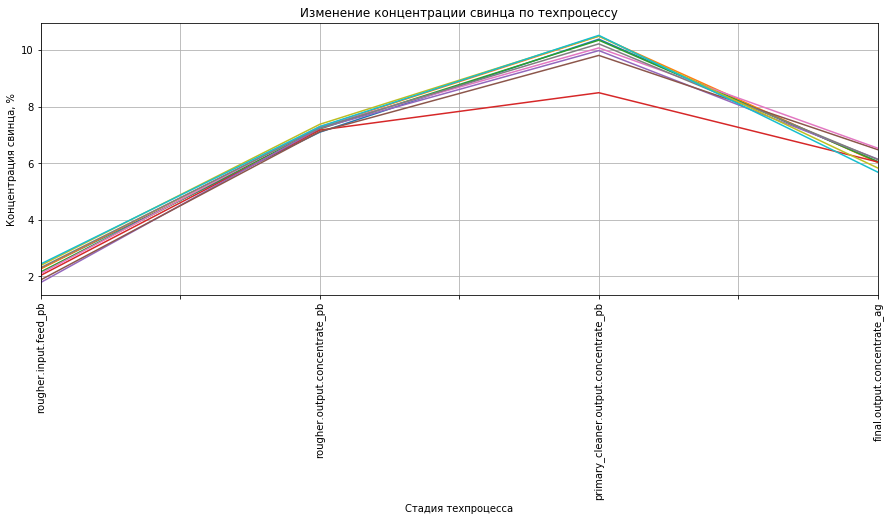

In [63]:
for i in range(0,10):
    (pb.loc[i].plot(rot=90, grid=True, figsize=(15, 5))
      .set(xlabel='Стадия техпроцесса', 
      ylabel='Концентрация свинца, %',  
      title='Изменение концентрации свинца по техпроцессу'));

Концентрация свинца растет на стадиях флотации и первичной очистки и уменьшается на втором этапе очистки

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> 
<u>КОММЕНТАРИЙ РЕВЬЮЕРА</u>
<font color='green'><br>
ОК, понятный графический анализ. И видно, что золотишко растёт - и это хорошо, кому-то).<br>
а свинец - побочное дитя химических реакций)

## 2.2 Сравнение размеров гранул сырья на обучающей и тестовой выборках

Сравним распределения размеров гранул сырья на обучающей и тестовой выборках. Если распределения сильно отличаются друг от друга, оценка модели может быть неправильной.

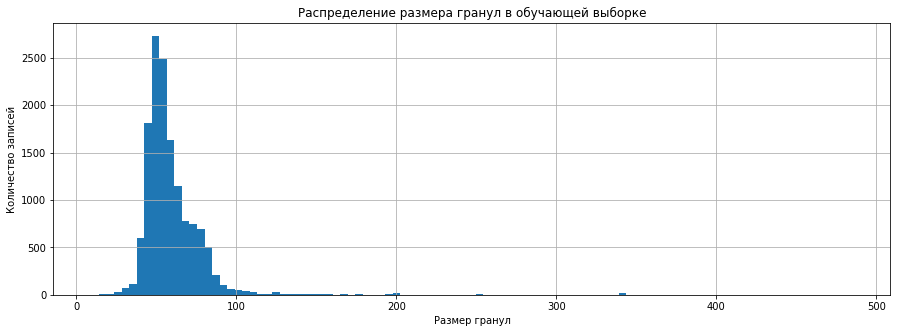

In [58]:
(train['rougher.input.feed_size'].hist(bins=101, figsize=(15,5))
 .set(xlabel='Размер гранул', 
      ylabel='Количество записей',  
      title='Распределение размера гранул в обучающей выборке'));

In [59]:
train['rougher.input.feed_size'].describe()

count    14063.000000
mean        60.051421
std         23.352223
min          9.659576
25%         48.872120
50%         55.190726
75%         65.775326
max        484.967466
Name: rougher.input.feed_size, dtype: float64

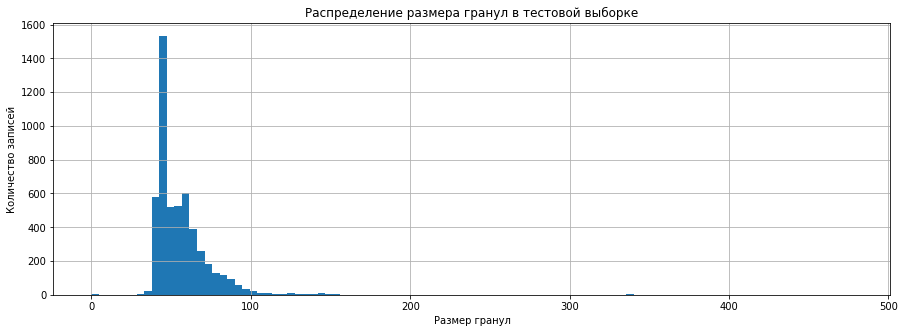

In [60]:
(test['rougher.input.feed_size'].hist(bins=101, figsize=(15,5))
 .set(xlabel='Размер гранул', 
      ylabel='Количество записей',  
      title='Распределение размера гранул в тестовой выборке'));

In [61]:
test['rougher.input.feed_size'].describe()

count    5171.000000
mean       56.457237
std        22.012336
min         0.046369
25%        43.878942
50%        51.154707
75%        62.587821
max       477.445473
Name: rougher.input.feed_size, dtype: float64

Распределения достаточно близки. Можно переходить к следующей стадии

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> 
<u>КОММЕНТАРИЙ РЕВЬЮЕРА</u>
<font color='green'><br>
ОК

## Исследование суммарной концентрации всех веществ на разных стадиях
### Стадия флотации

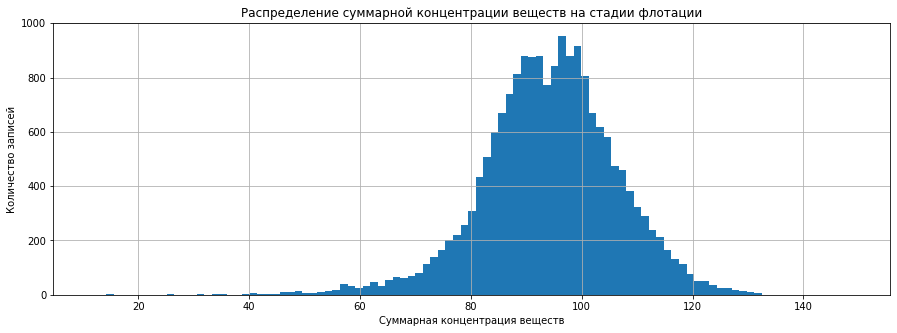

In [62]:
full['rougher.input.feed_sum'] = (full['rougher.input.feed_ag'] + full['rougher.input.feed_pb'] +
                                  full['rougher.input.feed_sol'] + full['rougher.input.feed_au'] +
                                  full['rougher.input.floatbank10_sulfate'] + full['rougher.input.floatbank10_xanthate'] +
                                  full['rougher.input.floatbank11_sulfate'] + full['rougher.input.floatbank11_xanthate']
                                  )
(full['rougher.input.feed_sum'].hist(bins=101, figsize=(15,5))
 .set(xlabel='Суммарная концентрация веществ', 
      ylabel='Количество записей',  
      title='Распределение суммарной концентрации веществ на стадии флотации'));

In [63]:
full['rougher.input.feed_sum'].describe()

count    18627.000000
mean        94.156282
std         12.324680
min         11.563012
25%         86.956098
50%         94.571452
75%        101.863163
max        148.804721
Name: rougher.input.feed_sum, dtype: float64

Так как в данных речь идет о двух флоатационных установках, то сумма всех веществ может быть больше 100%. Тем не менее очень низкие значения исходных веществ являются аномалиями. Оценим количество строк с низкими суммарными значениями и удалим их.

In [64]:
ROUGHER_INPUT_FEED_SUM_TRH = 50
(full['rougher.input.feed_sum'] < ROUGHER_INPUT_FEED_SUM_TRH).mean()

0.004107309971924717

In [65]:
train = train.drop(train.index[train['date'].isin(full[full['rougher.input.feed_sum'] < ROUGHER_INPUT_FEED_SUM_TRH]['date'])])
test = test.drop(test.index[test['date'].isin(full[full['rougher.input.feed_sum'] < ROUGHER_INPUT_FEED_SUM_TRH]['date'])])
full = full.drop(full.index[full['rougher.input.feed_sum'] < ROUGHER_INPUT_FEED_SUM_TRH])
(full['rougher.input.feed_sum'] < ROUGHER_INPUT_FEED_SUM_TRH).mean()

0.0

### Стадия первичной очистки

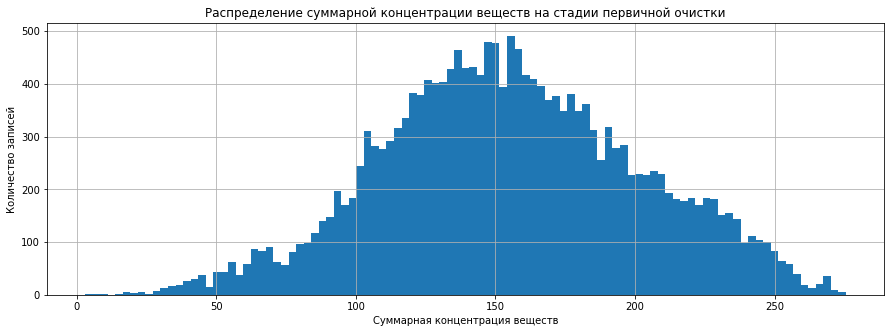

In [66]:
full['primary_cleaner.input.feed_sum'] = (full['primary_cleaner.input.sulfate'] + 
                                          full['primary_cleaner.input.depressant'] + 
                                          full['primary_cleaner.input.xanthate']
                                          )
(full['primary_cleaner.input.feed_sum'].hist(bins=101, figsize=(15,5))
 .set(xlabel='Суммарная концентрация веществ', 
      ylabel='Количество записей',  
      title='Распределение суммарной концентрации веществ на стадии первичной очистки'));

In [67]:
full['primary_cleaner.input.feed_sum'].describe()

count    19042.000000
mean       155.273336
std         46.075931
min          2.996929
25%        123.780778
50%        153.588641
75%        186.569113
max        275.590625
Name: primary_cleaner.input.feed_sum, dtype: float64

In [68]:
PRIMARY_CLEANER_INPUT_FEED_SUM_LOW_TRH = 25
(full['primary_cleaner.input.feed_sum'] < PRIMARY_CLEANER_INPUT_FEED_SUM_LOW_TRH).mean()

0.001096319498825372

In [69]:
PRIMARY_CLEANER_INPUT_FEED_SUM_HI_TRH = 262.5
(full['primary_cleaner.input.feed_sum'] > PRIMARY_CLEANER_INPUT_FEED_SUM_HI_TRH).mean()

0.004333072304881232

In [70]:
drop_date = full[(full['primary_cleaner.input.feed_sum'] < PRIMARY_CLEANER_INPUT_FEED_SUM_LOW_TRH) |
                 (full['primary_cleaner.input.feed_sum'] > PRIMARY_CLEANER_INPUT_FEED_SUM_HI_TRH)]['date']

train = train.drop(train.index[train['date'].isin(drop_date)])
test = test.drop(test.index[test['date'].isin(drop_date)])
full = full.drop(full.index[full['date'].isin(drop_date)])
((full['primary_cleaner.input.feed_sum'] < PRIMARY_CLEANER_INPUT_FEED_SUM_LOW_TRH) |
 (full['primary_cleaner.input.feed_sum'] > PRIMARY_CLEANER_INPUT_FEED_SUM_HI_TRH)).mean()

0.0

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> 
<u>КОММЕНТАРИЙ РЕВЬЮЕРА</u>
<font color='green'><br>
В некоторых проектах - это важно, избавиться от выбросов<br>

И вот если обратиться к нашему проекту:<br>
1) Есть нулевые аномалии - и их надо "убить" это точно: просто зачем нам нулевые измерения.<br>
    
2)А вот с выбросами как в приниципе..<br>
Тут на обсуждение: наша цель - предсказывать модель на реальных данных. И вот эти выбросы - это и есть реальная концентрация. И нам важно, чтобы модель умела и их тоже видеть и обрабатывать. Если их убрать из модели, то получится, что у нас она станет как бы искусственной. Т.е. будет работать только в небольших диапазонах - потому что обучалась только в них.<br>
    
Поэтому, тут так: выбросы - это не всегда то, от чего надо избавляться))) Ещё зависит от бизнес-задачи.<br>
    
Кстати<br>
если говорить о теории выбросов, то вот это интервал q3+-1.5*iqr говорит действильно о них самых<br>
Но нет рекоммендаций к их удалению. Говорят так "на усмотрение бизнеса".<br>
А вот если взять вот этот интервал q3+3*iqr:  то тут уж с очень высокой вероятность можно говорить о грубых выбросах.

<a id='section3'> </a>

# 3. Модель

Создадим функции для вычисления sMAPE и итогового sMAPE

In [75]:
def sMAPE_score(y_true, y_pred):
    if ((np.abs(y_true) + np.abs(y_pred)) == 0).any():
        print('Деление на ноль')
        return np.nan
    else:
        return np.sum(np.abs(y_true - y_pred) / ((np.abs(y_true) + np.abs(y_pred)) / 2)) / len(y_true)

In [76]:
def total_sMAPE_score(y_true, y_pred):
    y_rougher_true = y_true[:, 0]
    y_final_true = y_true[:, 1]
    y_rougher_pred = y_pred [:, 0]
    y_final_pred =  y_pred [:, 1]
    return 0.25 * sMAPE_score(y_rougher_true, y_rougher_pred) + 0.75 * sMAPE_score(y_final_true, y_final_pred)

In [77]:
y_col = ['rougher.output.recovery', 'final.output.recovery']
x_col = test.columns.drop(['date'] + y_col)
x_col

Index(['primary_cleaner.input.sulfate', 'primary_cleaner.input.depressant',
       'primary_cleaner.input.feed_size', 'primary_cleaner.input.xanthate',
       'primary_cleaner.state.floatbank8_a_air',
       'primary_cleaner.state.floatbank8_a_level',
       'primary_cleaner.state.floatbank8_b_air',
       'primary_cleaner.state.floatbank8_b_level',
       'primary_cleaner.state.floatbank8_c_air',
       'primary_cleaner.state.floatbank8_c_level',
       'primary_cleaner.state.floatbank8_d_air',
       'primary_cleaner.state.floatbank8_d_level', 'rougher.input.feed_ag',
       'rougher.input.feed_pb', 'rougher.input.feed_rate',
       'rougher.input.feed_size', 'rougher.input.feed_sol',
       'rougher.input.feed_au', 'rougher.input.floatbank10_sulfate',
       'rougher.input.floatbank10_xanthate',
       'rougher.input.floatbank11_sulfate',
       'rougher.input.floatbank11_xanthate', 'rougher.state.floatbank10_a_air',
       'rougher.state.floatbank10_a_level', 'rougher.state.floatba

Отмасштабируем числовые признаки

In [78]:
num_col = x_col
scaler = StandardScaler()
scaler.fit(train[num_col])
df_train_scaled = train.copy()
df_train_scaled[num_col] = scaler.transform(train[num_col])
df_train_scaled.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,rougher.output.recovery_manual_calc,final.output.recovery_manual_calc
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,-0.634824,-0.755698,-1.162139,-0.379454,-0.860018,-0.427504,-0.943996,-2.636206,87.107763,98.744534
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,-0.663304,-0.697565,-1.142620,-0.428003,-0.876585,-0.430356,-0.970720,-2.475028,86.843261,98.617181
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,-0.670500,-0.694162,-1.137179,-0.426937,-0.871502,-0.428699,-0.965426,-2.518689,86.842308,98.570585
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,-0.653959,-0.695198,-1.154454,-0.402725,-0.877882,-0.421988,-0.969463,-2.480590,87.226430,97.296409
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,-0.662820,-0.692796,-1.162126,-0.467598,-0.892384,-0.424556,-0.971018,-2.520535,86.688794,98.513891


In [79]:
df_test_scaled = test.copy()
df_test_scaled[num_col] = scaler.transform(test[num_col])

In [80]:
df_train_scaled[x_col].shape

(13963, 52)

### Линейная регрессия

In [82]:
linear_regression_model = LinearRegression()
scores = cross_val_score(linear_regression_model, df_train_scaled[x_col], df_train_scaled[y_col].values, cv=5, 
                         scoring = make_scorer(total_sMAPE_score, greater_is_better=False), n_jobs=-1)
scores

array([-0.1139, -0.0891, -0.0935, -0.0767, -0.121 ])

In [83]:
print("Модель показывает sMAPE: %0.4f. СКО оценки при этом: %0.4f" % (-scores.mean(), scores.std()))

Модель показывает sMAPE: 0.0989. СКО оценки при этом: 0.0163


### Случайный лес

In [84]:
# # ниже представлен код который переберает число деревьев и их глубину и ищет наилучшую модель по заданному критерию
# # так как перебор занимает порядка 4 часов код закомментирован.  
# # модель с уже найдеными лучшими параметрами представлена в следующей ячейке

# best_forest_depth = 1
# best_forest_n_estimators = 1
# best_forest_mean_score = 100
# best_forest_std_score = 0
# for n_estimators in tqdm(range(1, 151, 10)):
#     for depth in range(1, 21, 2):
#         random_forest_model = RandomForestRegressor(n_estimators=n_estimators, max_depth=depth, random_state=42, n_jobs=-1)
#         scores = cross_val_score(random_forest_model, df_train_scaled[x_col], df_train_scaled[y_col].values, cv=5, 
#                                  scoring = make_scorer(total_sMAPE_score, greater_is_better=False), n_jobs=-1)
#         if -scores.mean() < best_forest_mean_score:
#             best_forest_depth = depth
#             best_forest_n_estimators = n_estimators
#             best_forest_mean_score = -scores.mean()
#             best_forest_std_score = scores.std()

# print("Модель показывает итоговый sMAPE: %0.4f. СКО оценки при этом: %0.4f" % (best_forest_mean_score, best_forest_std_score))
# print('Число деревьев:', best_forest_n_estimators)
# print('Глубина деревьев %0.4f' % (best_forest_depth))

In [85]:
best_random_forest_model = RandomForestRegressor(n_estimators=91,
                                                 max_depth=3, random_state=42)
scores = cross_val_score(best_random_forest_model, df_train_scaled[x_col], df_train_scaled[y_col].values, cv=5, 
                                 scoring = make_scorer(total_sMAPE_score, greater_is_better=False), n_jobs=-1)

print("Модель показывает итоговый sMAPE: %0.4f. СКО оценки при этом: %0.4f" % (-scores.mean(), scores.std()))

Модель показывает итоговый sMAPE: 0.0860. СКО оценки при этом: 0.0075


### CatBoost

Проверим на кросвалидации модель CatBoost создадим отдельную модель для оценки эффективности восстановления золота после всего техцикла и после этапа флотации. Начнем с полного техцикла

In [86]:
cv_final_pool = Pool(df_train_scaled[x_col], df_train_scaled[y_col].values[:, 1])

params = {"learning_rate": 0.5,
          "iterations": 100,
          "loss_function": "MAPE",
          "eval_metric": "SMAPE",
          "random_state": 42,
          "verbose": 10}

scores = cv(cv_final_pool, params, fold_count=5)

0:	learn: 66.2901163	test: 66.3954488	best: 66.3954488 (0)	total: 699ms	remaining: 1m 9s
10:	learn: 9.3678355	test: 9.6383311	best: 9.6383311 (10)	total: 4.37s	remaining: 35.4s
20:	learn: 8.2725165	test: 8.6285601	best: 8.6285601 (20)	total: 7.86s	remaining: 29.6s
30:	learn: 8.0791742	test: 8.5217631	best: 8.5217631 (30)	total: 11.2s	remaining: 25s
40:	learn: 7.9549836	test: 8.4640582	best: 8.4640582 (40)	total: 14.7s	remaining: 21.2s
50:	learn: 7.8777967	test: 8.4270416	best: 8.4270416 (50)	total: 18.3s	remaining: 17.5s
60:	learn: 7.8444192	test: 8.4105624	best: 8.4105624 (60)	total: 21.6s	remaining: 13.8s
70:	learn: 7.8015179	test: 8.3946613	best: 8.3946613 (70)	total: 25.2s	remaining: 10.3s
80:	learn: 7.7714913	test: 8.3873191	best: 8.3873191 (80)	total: 29.4s	remaining: 6.89s
90:	learn: 7.7472418	test: 8.3754188	best: 8.3744193 (89)	total: 33.7s	remaining: 3.33s
99:	learn: 7.7305191	test: 8.3715924	best: 8.3715924 (99)	total: 36.8s	remaining: 0us


In [87]:
scores.tail()

,iterations,test-SMAPE-mean,test-SMAPE-std,train-SMAPE-mean,train-SMAPE-std,test-MAPE-mean,test-MAPE-std,train-MAPE-mean,train-MAPE-std
95,95,8.374011,0.138924,7.738686,0.146969,0.104919,0.009042,0.082848,0.001620
96,96,8.373723,0.138605,7.736733,0.147029,0.104914,0.009040,0.082826,0.001613
97,97,8.372574,0.137548,7.734098,0.148899,0.104888,0.009025,0.082801,0.001625
98,98,8.372881,0.137625,7.733866,0.149242,0.104890,0.009026,0.082799,0.001628
99,99,8.371592,0.134840,7.730519,0.146191,0.104881,0.009025,0.082765,0.001589


Модель дает средний sMAPE для данного параметра на валидации 8,37 при СКО 0,13. Оценим sMAPE для прогноза восстановления золота после этапа флотации

In [88]:
cv_rougher_pool = Pool(df_train_scaled[x_col], df_train_scaled[y_col].values[:, 0])

params = {"learning_rate": 0.5,
          "iterations": 100,
          "loss_function": "MAPE",
          "eval_metric": "SMAPE",
          "random_state": 42,
          "verbose": 10}

scores = cv(cv_rougher_pool, params, fold_count=5)

0:	learn: 66.3333602	test: 66.4048808	best: 66.4048808 (0)	total: 439ms	remaining: 43.5s
10:	learn: 5.1602618	test: 5.3290397	best: 5.3290397 (10)	total: 4.1s	remaining: 33.2s
20:	learn: 4.3470766	test: 4.5975167	best: 4.5975167 (20)	total: 7.71s	remaining: 29s
30:	learn: 4.0414842	test: 4.3587857	best: 4.3587857 (30)	total: 11.4s	remaining: 25.3s
40:	learn: 3.8351585	test: 4.2098719	best: 4.2098719 (40)	total: 15.2s	remaining: 21.8s
50:	learn: 3.7182945	test: 4.1455211	best: 4.1455211 (50)	total: 19s	remaining: 18.3s
60:	learn: 3.6134603	test: 4.0798684	best: 4.0798684 (60)	total: 22.7s	remaining: 14.5s
70:	learn: 3.5402646	test: 4.0425612	best: 4.0425612 (70)	total: 26.2s	remaining: 10.7s
80:	learn: 3.4811386	test: 4.0126647	best: 4.0126647 (80)	total: 29.8s	remaining: 6.98s
90:	learn: 3.4343321	test: 3.9910811	best: 3.9910811 (90)	total: 33.3s	remaining: 3.29s
99:	learn: 3.3962282	test: 3.9768294	best: 3.9747552 (95)	total: 36.9s	remaining: 0us


In [89]:
scores.tail()

,iterations,test-SMAPE-mean,test-SMAPE-std,train-SMAPE-mean,train-SMAPE-std,test-MAPE-mean,test-MAPE-std,train-MAPE-mean,train-MAPE-std
95,95,3.974755,0.191084,3.408959,0.170568,0.044137,0.004008,0.035021,0.001552
96,96,3.977869,0.189128,3.405631,0.171040,0.044160,0.004021,0.034956,0.001564
97,97,3.977498,0.188603,3.402680,0.173097,0.044155,0.004025,0.034923,0.001584
98,98,3.976976,0.189477,3.398177,0.177617,0.044135,0.004006,0.034871,0.001639
99,99,3.976829,0.189754,3.396228,0.178849,0.044136,0.004012,0.034837,0.001672


Модель дает средний sMAPE для данного параметра на валидации 3,98 при СКО 0,19. 

Создадим модели с требуемыми параметрами

In [90]:
catboost_rougher_model = CatBoostRegressor(learning_rate=0.5, iterations=100,
                                          loss_function='MAPE', eval_metric='SMAPE', random_state=42, verbose=10)
catboost_rougher_model.fit(cv_rougher_pool)

0:	learn: 6.3476271	total: 9.15ms	remaining: 906ms
10:	learn: 4.2849437	total: 687ms	remaining: 5.56s
20:	learn: 3.7971499	total: 1.38s	remaining: 5.19s
30:	learn: 3.5482010	total: 2.07s	remaining: 4.61s
40:	learn: 3.3788335	total: 2.67s	remaining: 3.85s
50:	learn: 3.2601505	total: 3.37s	remaining: 3.24s
60:	learn: 3.1565359	total: 4.16s	remaining: 2.66s
70:	learn: 3.0519703	total: 4.76s	remaining: 1.94s
80:	learn: 2.9925410	total: 5.44s	remaining: 1.28s
90:	learn: 2.9357497	total: 6.04s	remaining: 598ms
99:	learn: 2.8996935	total: 6.64s	remaining: 0us


In [91]:
catboost_final_model = CatBoostRegressor(learning_rate=0.5, iterations=100,
                                          loss_function='MAPE', eval_metric='SMAPE', random_state=42, verbose=10)
catboost_final_model.fit(cv_final_pool)

0:	learn: 9.7273561	total: 8.54ms	remaining: 846ms
10:	learn: 8.3523233	total: 642ms	remaining: 5.19s
20:	learn: 7.8333450	total: 1.33s	remaining: 4.99s
30:	learn: 7.6034410	total: 1.93s	remaining: 4.3s
40:	learn: 7.5257351	total: 2.62s	remaining: 3.77s
50:	learn: 7.4986524	total: 3.22s	remaining: 3.09s
60:	learn: 7.4756541	total: 3.9s	remaining: 2.5s
70:	learn: 7.4400659	total: 4.5s	remaining: 1.84s
80:	learn: 7.3771260	total: 5.19s	remaining: 1.22s
90:	learn: 7.2403355	total: 5.88s	remaining: 582ms
99:	learn: 7.2241148	total: 6.47s	remaining: 0us


### Тестирование модели

In [92]:
# создадим массив y_true_test в который вложены пары истинных значений целевых переменных 
# (аналогично тому как возвращает предсказания метод predict в sklearn)

y_true_test = []
for i in df_test_scaled.index:
    y_true_test.append([df_test_scaled.loc[i, 'rougher.output.recovery'], 
                        df_test_scaled.loc[i, 'final.output.recovery']])
y_true_test = np.array(y_true_test)
y_true_test

array([[89.9934, 70.2736],
       [88.0897, 68.9104],
       [88.4128, 68.1432],
       ...,
       [93.0181, 67.0928],
       [92.599 , 68.0612],
       [91.1777, 71.7   ]])

In [93]:
# аналогично создадим массив предсказаний модели catboost

y_pred_cb = []
y_pred_rougher = catboost_rougher_model.predict(df_test_scaled[x_col])
y_pred_final = catboost_final_model.predict(df_test_scaled[x_col])
for i, j in zip(y_pred_rougher, y_pred_final):
    y_pred_cb.append([i, j])
    
y_pred_cb = np.array(y_pred_cb)
y_pred_cb

array([[90.2072, 69.2708],
       [89.7246, 69.6593],
       [89.9197, 69.9048],
       ...,
       [92.7493, 73.9931],
       [92.9198, 74.9942],
       [92.5255, 75.0875]])

In [94]:
print('Итоговый sMAPE для модели catboost на тестовой выборке: %0.4f' 
      % total_sMAPE_score(y_true_test, y_pred_cb))

Итоговый sMAPE для модели catboost на тестовой выборке: 0.0664


In [95]:
best_random_forest_model.fit(df_train_scaled[x_col], df_train_scaled[y_col])
print('Итоговый sMAPE для модели случайного леса на тестовой выборке: %0.4f' 
      % total_sMAPE_score(y_true_test, best_random_forest_model.predict(df_test_scaled[x_col])))

Итоговый sMAPE для модели случайного леса на тестовой выборке: 0.0825


In [96]:
linear_regression_model.fit(df_train_scaled[x_col], df_train_scaled[y_col])
print('Итоговый sMAPE для модели линейной регрессии на тестовой выборке: %0.4f'
     % total_sMAPE_score(y_true_test, linear_regression_model.predict(df_test_scaled[x_col])))

Итоговый sMAPE для модели линейной регрессии на тестовой выборке: 0.0708


### Проверка модели на адекватность
Заполним предсказания медианой и оценим итоговый sMAPE

In [97]:
dummy_regressor = DummyRegressor(strategy='median')
dummy_regressor.fit(df_train_scaled[x_col], df_train_scaled[y_col])
total_sMAPE_score(y_true_test, dummy_regressor.predict(df_test_scaled[x_col]))

0.07307755621516311

Итоговый sMAPE предсказания по медиане 0,07374

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> 
<u>КОММЕНТАРИЙ РЕВЬЮЕРА</u>
<font color='green'><br>
Павел, ещё одна интересная работа от тебя.<br>
Понятно, логично, вдумчиво. Проект отличается именно этим: всё по делу и со смыслом.<br>
Здорово, что не забыл использовать в трайне только те факторы, что в тесте. И сравнить результат с константной моделью.<br><br>
    
Ещё вот что хотел бы написать: 
Наша модель и константная - примерно одинаковые (это допустимо в этом проекте). Что же тогда ещё для дальнейшего улучшения качества моделирования возможно сделать?<br>
Попробовал систематизировать:<br>
1) качество данных на входе: ещё раз оценить аномалии, пропуски, соответствие физике (правдиво ли всё)<br>
2) Работа с моделями:<br>
- Генерация и поиск бизнес-факторов для моделирования: возможно что-то упустили, или придумать что-то гибридное из имеющихся факторов... В общем ещё раз пройтись по бизнес-цепочке процесса<br>
- Подбор самих моделей. показателей самих моделей <br>
- Подбор параметров выбранных показателей у выбранных моделей <br>
    
3)Плюс, есть же ещё параметры самого процесса: температура, скорость конвейера, сила удара чего-то там....<br> Они тоже могут помочь<br>
4) ну и разобраться ещё раз с физическими и производственными процессами. ВОзможно приниципиально иное решение можно создать.<br> 
    
В общем-то другого и нет. Только такие возможности.<br>
Если углубится в так называемый "Статистический анализ данных" (SPC) - по сути это превариетльная подготовка данных в этом проекте, можно найти какое-нибудь решение<br>

Но цель проекта достигнута:<br>
1) пройдены важные этапы построения производственной модели<br>
2) возникло много дополнительных вопросов))

Спасибо за работу)<br>
УСПЕШНОГО ДАЛЬНЕЙШЕГО ОБУЧЕНИЯ!
    
и С НАСТУПАЮЩИМ НОВЫМ ГОДОМ!<br>
Пусть в нём будут у тебя 2021% -ые дивиденды от обучения в нашей школе!

<a id='section4'> </a>

# Выводы

В процессе исследования были проведены следующие работы:
1. Проведена подготовка данных (проверена формула вычисления эффективности обогощения, проведена предобработка данных, заполнены пропуски)
2. Проанализированы данные (исследовано изменение концентрации металлов при переходе по стадиям технологического цикла, проанализированы распределения размеров гранул на обучающей и тестовой выборках, исследованы суммарные концентрации)
3. Построена модель прогнозирования (написана функция вычисления итогового sMAPE, обучены и проверены модели линейной регресии, случайного леса, catboost)


По результатам исследования сделаны следующие выводы:
* Концентрация золота увеличивается при переходе от одной стадии технологического цикла к следующей
* Концентрация серебра растет на стадии флотации и затем уменшается на стадиях очистки
* Концентрация свинца растет на стадиях флотации и первичной очистки и уменьшается на втором этапе очистки
* Распределения размеров гранул сырья на тестовой и обучающей выборке достаточно близки
* Заполнение целевых признаков медианой дает значение итогового sMAPE - 0,07374
* Из рассмотренных моделей наилучший результат по итоговму sMAPE на тестовой выборке показал catboost - 0,0664, второй по данному показателю оказалась модель линейной регрессии с результатом 0,0708
* модель случайного леса проигрывает другим рассмотренным моделям, а так же предсказанию по медиане и показывает результат 0.0825


Для дальнейшей работы рекомендуется рассмотреть возможность внедрения разработанной модели на основе catboost, а так же оценить возможность объединения предсказаний нескольких моделей для повышения точности.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке выполнения
- [x]  Выполнен шаг 1: данные подготовлены
    - [x]  Проверена формула вычисления эффективности обогащения
    - [x]  Проанализированы признаки, недоступные в тестовой выборке
    - [x]  Проведена предобработка данных
- [x]  Выполнен шаг 2: данные проанализированы
    - [x]  Исследовано изменение концентрации элементов на каждом этапе
    - [x]  Проанализированы распределения размеров гранул на обучающей и тестовой выборках
    - [x]  Исследованы суммарные концентрации
    - [x]  Проанализированы и обработаны аномальные значения
- [x]  Выполнен шаг 3: построена модель прогнозирования
    - [x]  Написана функция для вычисления итогового *sMAPE*
    - [x]  Обучено и проверено несколько моделей
    - [x]  Выбрана лучшая модель, её качество проверено на тестовой выборке